# Processing -1 Year

# Table of Contents
1. [Import Packages](#imports)
2. [Import the Data](#importdata)
3. [Preprocess Data](#preprocess)
4. [Data Visualizations](#dataviz)
5. [Save Processed Data](#processeddata)




### Import Packages   <a name="imports"></a>

In [153]:
# Import  libraries

import pandas as pd
import numpy as np 


### Import the data  <a name="importdata"></a>

In [154]:
Year1 = pd.read_csv('Data/DadosPorAno/Year1Raw.csv', encoding="ANSI", sep=';')
Year1.head(5)

,Estruturação da Dreamfactory,Estruturação da Dreamfactory.1,Em que medida os vídeos foram úteis ou pedagógicos?,Em que medida os exemplos foram úteis ou pedagógicos?
0,Satisfeito,está no seu formato ideal,5,3
1,Indiferente,está no seu formato ideal,1,4
2,Satisfeito,gostaria de mais perguntas intermédias,5,4
3,Satisfeito,gostaria de mais perguntas intermédias,5,4
4,Satisfeito,gostaria de mais perguntas intermédias,2,2


### PreProcess Data  <a name="preprocess"></a>

In [155]:
Year1['Estruturação da Dreamfactory'].unique()

array(['Satisfeito', 'Indiferente', 'Pouco satisfeito',
       'Muito satisfeito'], dtype=object)

In [156]:
Year1.loc[Year1['Estruturação da Dreamfactory']== "Pouco satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 1
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Indiferente", 'Está satisfeito com a ferramenta Dreamfactory?'] = 2
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 3
Year1.loc[Year1['Estruturação da Dreamfactory'] == "Muito satisfeito", 'Está satisfeito com a ferramenta Dreamfactory?'] = 4


### Data Visualizations  <a name="dataviz"></a>

In [157]:
Year1Liked = Year1['Está satisfeito com a ferramenta Dreamfactory?']
Year1LikedOrig= Year1Liked.copy()

In [158]:
unique_elements, counts_elements = np.unique(Year1Liked, return_counts=True)


In [159]:
Year1Liked = pd.DataFrame({'Liked?':unique_elements, 'counts':counts_elements})


In [160]:
Year1Liked
Year1Liked['year'] = 2013
Year1Liked['population'] = 91
Year1Liked['percentage'] = Year1Liked['counts']/Year1Liked['population']



In [161]:
Liked = ["Year", "AverageLiked"]

LikedOverYears = pd.DataFrame(columns = Liked)

In [162]:
import statistics 
meanLiked=statistics.mean(Year1LikedOrig)

In [163]:
meanLiked

2.6263736263736264

In [164]:
df2 = pd.DataFrame([ [2013, meanLiked]], columns=["Year", "AverageLiked"])


LikedOverYears=LikedOverYears.append(df2)


In [165]:
Year1Liked['Liked?'] = Year1Liked['Liked?'].astype(int)


#df[list("ABCD")] = df[list("ABCD")].astype(int)

In [166]:
Year1Liked.dtypes

Liked?          int32
counts          int64
year            int64
population      int64
percentage    float64
dtype: object

In [167]:
import plotly_express as px

fig = px.bar(Year1Liked, x='Liked?', y='percentage')

fig.update_layout(title_text='Está satisfeito com a ferramenta Dreamfactory?-2012/2013 - Year -1')

fig.show()
fig.write_image('Outputs/ImageOutputsYear/Year1Liked.png')


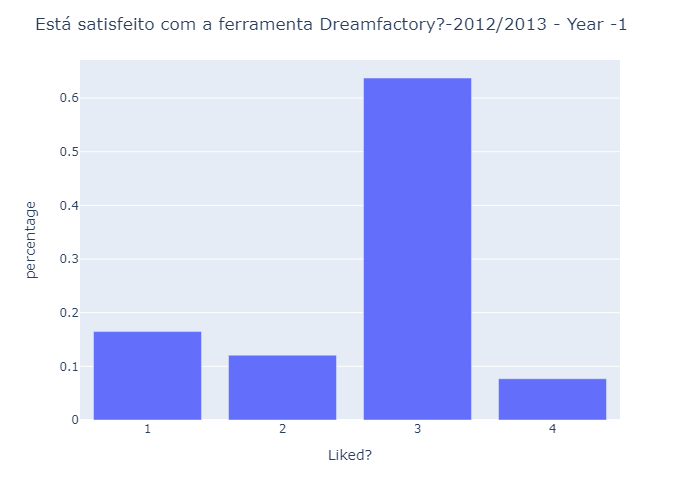

In [168]:
from IPython.display import Image
Image(filename='Outputs/ImageOutputsYear/Year1Liked.png')


### Save Processed Data<a name="processeddata"></a>

In [129]:
Year1.to_csv(r'Data/DadosPorAnoProcessados/Year1Processed.csv', index = False)


In [169]:
LikedOverYears.to_csv(r'Data/DadosAoLongoDosAnos/LikedOverYearsYEAR1.csv', index = False)
